In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!pip install geopandas folium


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.1/1.1 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 16.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 17.4 MB/s eta 0:00:00


In [8]:
import geopandas as gpd
from shapely.geometry import Point
import folium

import seaborn as sns


In [12]:
df1 = pd.read_csv(r"C:\Users\user\Downloads\test.csv\test.csv")
df1.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [13]:
df1.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [14]:
df = df1.drop('ID_LAT_LON_YEAR_WEEK',axis=1)
df.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [17]:
train = pd.read_csv(r"C:\Users\user\Downloads\playground-series-s3e20\train.csv")
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [23]:
test = pd.read_csv(r"C:\Users\user\Downloads\playground-series-s3e20\test.csv")
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [19]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [18]:
train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [15]:
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,24353.000000,24353.000000,24353.0,24353.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,...,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000
mean,-1.891072,29.880155,2022.0,24.000000,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,52291.369823,5850.560884,58914.750636,4876.144989,18.219421,0.256019,-15.910583,40.078944,-82.411205,27.984961
std,0.694532,0.810387,0.0,14.142426,0.000234,0.168043,0.000170,0.079865,67.148199,14.156478,...,8474.312135,1385.456558,9137.478850,1363.987819,12.276853,0.046614,31.296817,6.289530,35.684048,4.446146
min,-3.299000,28.228000,2022.0,0.000000,-0.000977,0.339845,-0.000775,0.000000,-106.809900,0.099606,...,22968.371094,1748.440552,26601.015625,1108.339359,1.758491,0.015563,-106.794670,0.181503,-148.381015,14.451874
25%,-2.451000,29.262000,2022.0,12.000000,-0.000122,0.678384,-0.000094,0.078934,-41.627297,26.577654,...,46443.513511,4891.547765,52564.911002,3919.961568,10.090358,0.229489,-35.621207,35.431041,-119.069505,24.359645
50%,-1.882000,29.883000,2022.0,24.000000,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,52026.814647,5813.010892,58725.298896,4828.621533,14.748459,0.257279,-12.945370,41.097947,-75.828261,28.389770
75%,-1.303000,30.471000,2022.0,36.000000,0.000137,0.872586,0.000104,0.200819,73.664560,45.972595,...,57814.509397,6780.095125,64998.470002,5793.453767,22.200969,0.287632,4.320550,44.186126,-46.573705,31.624962
max,-0.510000,31.532000,2022.0,48.000000,0.004110,1.696826,0.002701,0.299973,157.503026,66.243271,...,83092.004251,11840.539740,88543.121457,10840.539720,123.585268,0.507783,81.252467,65.118706,-22.295398,39.770470


> From the above stats summaray, we can deduce the following insights:

> The train data is from year 2019 to 2021
> The latitude and longitude are mostly within Rwanda

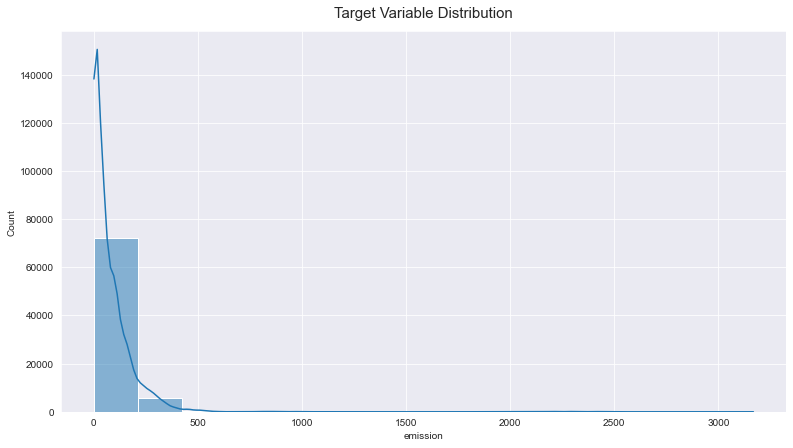

None

10.173825825101622

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(13,7))
sns.histplot(train.emission, kde=True, bins=15)
plt.title("Target Variable Distribution", y= 1.02, fontsize=15)
display(plt.show(), train.emission.skew())

## Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


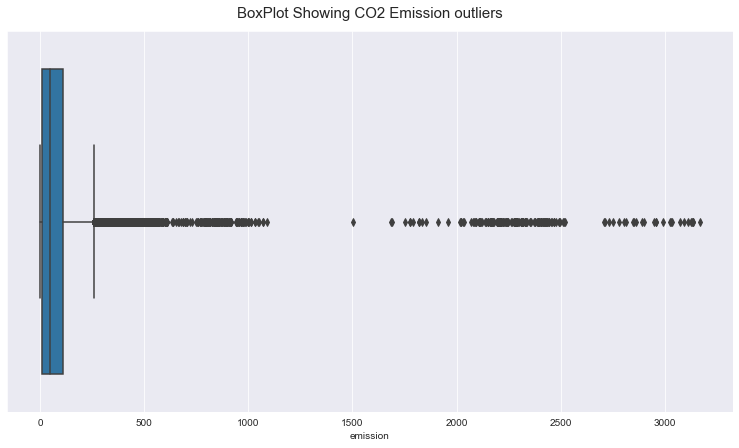

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(13,7))
sns.boxplot(train.emission)
plt.title("BoxPlot Showing CO2 Emission outliers", y=1.02, fontsize=15)
plt.show()

## Geo Visualisation

In [25]:
# Combining train and test for easy visualisation

train_coords = train.drop_duplicates(subset=['latitude','longitude'])
test_coords = test.drop_duplicates(subset=['latitude','longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train','test'


all_data = pd.concat([train_coords,test_coords],ignore_index=True)

# Creating Point Geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(all_data[["latitude","longitude","set_type"]],geometry = geometry)

geo_df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_7240/2361851930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train','test'


,latitude,longitude,set_type,geometry
0,-0.510,29.290,train,POINT (29.29000 -0.51000)
1,-0.528,29.472,train,POINT (29.47200 -0.52800)
2,-0.547,29.653,train,POINT (29.65300 -0.54700)
3,-0.569,30.031,train,POINT (30.03100 -0.56900)
4,-0.598,29.102,train,POINT (29.10200 -0.59800)


In [26]:
# Creating a canvas to plot map on
all_data_map = folium.Map(prefer_canvas=True)

# Creating a geometry list from GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]


# Iterating through a list and a marker for each volcano,color-codes by its type
i=0
for coordinates in geo_df_list:
    if geo_df.set_type[i] == "train":
        type_color="green"
    elif geo_df.set_type[i] =="test":
        type_color="orange"
        
#      Placing the markers
    all_data_map.add_child(
    folium.CircleMarker(
    location=coordinates,
    radius=1,
    weight=4,
    zoom=10,
    popup=
    "Set: "+ str(geo_df.set_type[i]) + "<br>"
    "Coordinates: "+ str([round(x,2) for x in geo_df_list[i]]),
    color=type_color),
    )
    i=i+1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

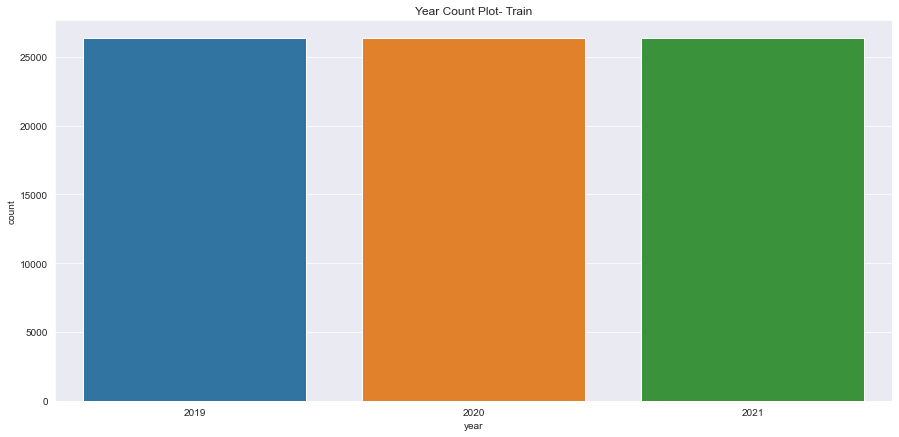

In [27]:
# Year CountPlot
plt.figure(figsize=(15,7))
sns.countplot(x='year', data=train)
plt.title('Year Count Plot- Train')
plt.show()

In [29]:
train.drop_duplicates(subset=['year','week_no']).groupby(['year'])[['week_no']].count()

,week_no
year,
2019,53
2020,53
2021,53


In [30]:
#  20 Correlated Features to the target
top20_corrs = abs(train.corr()['emission']).sort_values(ascending=False).head(20)
top20_corrs

emission                                                    1.000000
longitude                                                   0.102746
UvAerosolLayerHeight_aerosol_height                         0.069008
UvAerosolLayerHeight_aerosol_pressure                       0.068138
Cloud_surface_albedo                                        0.046587
CarbonMonoxide_H2O_column_number_density                    0.043217
CarbonMonoxide_CO_column_number_density                     0.041328
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.040263
UvAerosolLayerHeight_aerosol_optical_depth                  0.040156
UvAerosolLayerHeight_sensor_azimuth_angle                   0.035142
NitrogenDioxide_solar_azimuth_angle                         0.033417
Formaldehyde_tropospheric_HCHO_column_number_density        0.033333
SulphurDioxide_solar_azimuth_angle                          0.032338
Formaldehyde_solar_azimuth_angle                            0.030815
NitrogenDioxide_sensor_altitude   

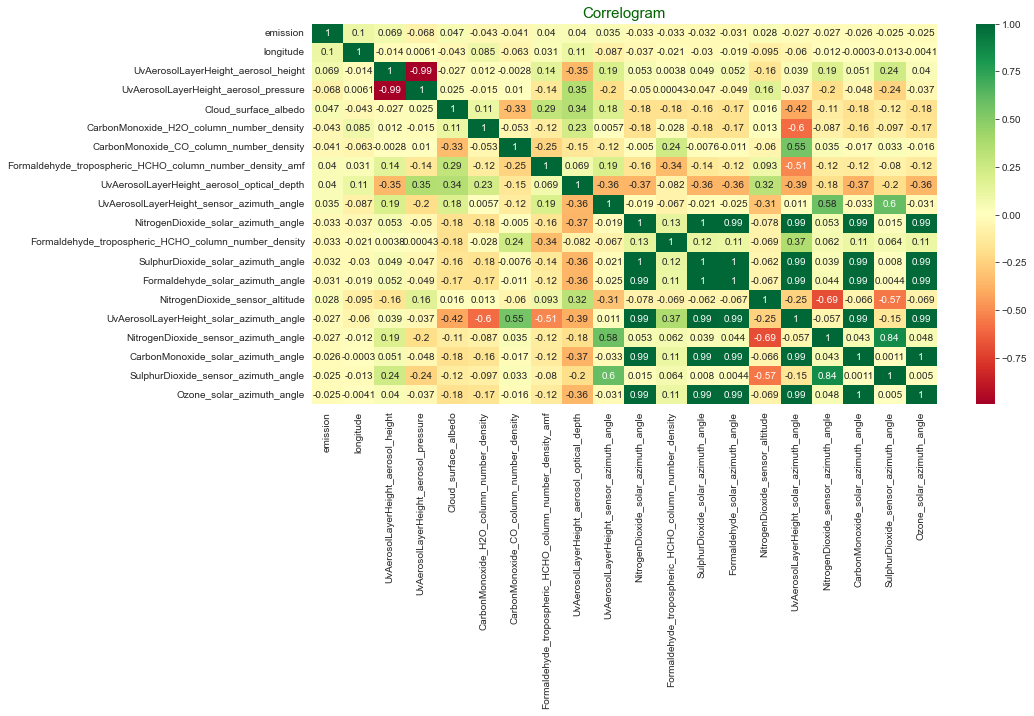

In [31]:
# Quantifyting Correlations between features

corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,cmap='RdYlGn',annot=True,center=0)
plt.title('Correlogram',fontsize=15,color='darkgreen')
plt.show()

## TimeSeries Visualization

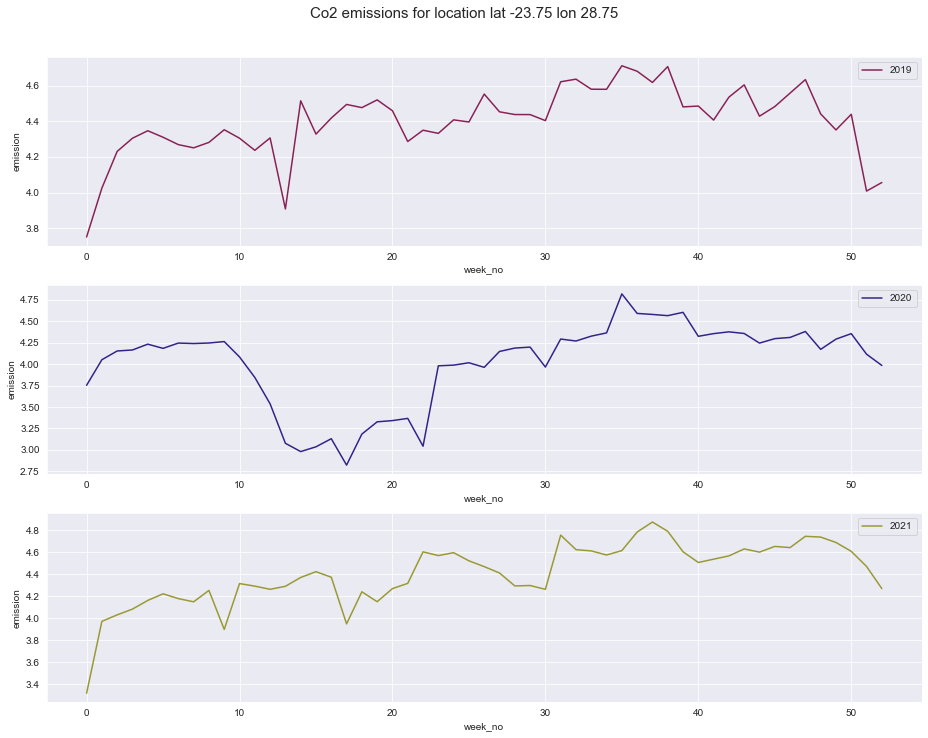

In [33]:
# Sample a unique location and visualize its emissions acrros the years
train.latitude, train.longitude = round(train.latitude,2), round(train.longitude,2)
sample_loc = train[(train.latitude == -0.510) & (train.longitude==29.290)]

# Plot a line Plot
sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(13,10))
fig.suptitle('Co2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize=15)

for ax,data,year,color, in zip(axes.flatten(),sample_loc,sample_loc.year.unique(),['#882255','#332288','#999933','orangered']):
    df = sample_loc[sample_loc.year == year]
    sns.lineplot(x=df.week_no, y = df.emission, ax=ax, label=year, color=color)
plt.legend()
plt.tight_layout()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [50]:
train['location'] = [str(x)+ '_'+ str(y) for x,y in zip(train['latitude'], train['longitude'])]

In [53]:
# Filter based on one location
example_loc = train[train['location']=='-0.51_29.29']

#  Calculating Rolling mean
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()


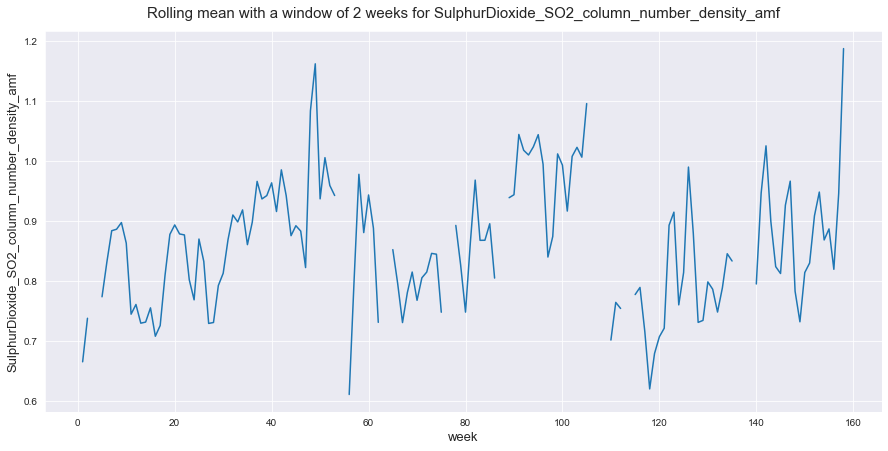

In [54]:
# Plotting Rolling mean
plt.figure(figsize=(15,7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf',y=1.02, fontsize=15)
plt.xlabel('week',y=1.05,fontsize=13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf',x=1.05,fontsize=13)
plt.show()

In [57]:
train_roll_mean = train.sort_values(by=['location','year','week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window=2).mean().reset_index()

train_roll_mean.drop(['level_1','emission','location'],axis=1,inplace=True)

train_roll_mean.columns = [col+'_roll_mean' for col in train_roll_mean.columns]

# Feature Engineering test
test['latitude'], test['longitude'] = round(test['latitude'],2), round(test['longitude'],2)

test['location'] = [str(x)+ '_'+str(y) for x,y in zip(test['latitude'], test['longitude'])]
test_roll_mean= test.sort_values(by=['location','year','week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window=2).mean().reset_index()
test_roll_mean.drop(['level_1','location'],axis=1,inplace=True)
test_roll_mean.columns = [col +'_roll_mean' for col in test_roll_mean.columns]

test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.882293,7474.230400,47981.823039,6474.230319,9.692027,0.266946,-65.312056,38.049819,-135.840184,32.395981
2,0.000308,0.648136,0.000211,0.039935,17.091927,27.744833,-138.719412,29.475403,0.000105,0.037718,...,41336.408855,7730.471513,46960.901164,6730.471432,11.100808,0.280124,4.288521,44.169537,-141.708905,28.877870
3,0.000255,0.651012,0.000174,0.140449,15.057112,49.375801,-144.954208,25.930653,0.000073,0.038769,...,42494.035772,7499.759881,48326.231059,6499.759909,11.258868,0.285905,7.311117,44.038449,-139.906440,28.174067
4,0.000017,0.638722,0.000030,0.202690,74.180215,37.254279,-144.397097,23.067462,0.000008,0.039488,...,48724.838110,6432.002268,55271.455120,5432.002255,12.414937,0.294450,-18.686488,36.131530,-135.264005,27.940791


In [61]:
# Merging Features with train and test set

#  train
train_eng = train.sort_values(by=['location','year','week_no'],ignore_index=True).merge(train_roll_mean, how = 'left',left_index=True, right_index=True)

# Test

test_eng = test.sort_values(by=['location','year','week_no'],ignore_index=True).merge(test_roll_mean,how='left',left_index=True,right_index=True)

# Preview Engineered Test head
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,42280.882293,7474.230400,47981.823039,6474.230319,9.692027,0.266946,-65.312056,38.049819,-135.840184,32.395981
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,41336.408855,7730.471513,46960.901164,6730.471432,11.100808,0.280124,4.288521,44.169537,-141.708905,28.877870
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,42494.035772,7499.759881,48326.231059,6499.759909,11.258868,0.285905,7.311117,44.038449,-139.906440,28.174067
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,48724.838110,6432.002268,55271.455120,5432.002255,12.414937,0.294450,-18.686488,36.131530,-135.264005,27.940791


## Modelling

In [62]:
import random

In [63]:
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [59]:
X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK','location','emission'],axis=1).fillna(0)
y = train_eng['emission']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

In [65]:
clf = RandomForestRegressor(random_state=SEED, n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=2023)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
print(f"RMSE Score: {mean_squared_error(y_test,y_pred,squared=False)}")

RMSE Score: 25.716494500967652


In [69]:
X_test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
42962,-1.98,31.22,2019,32,-0.000260,0.757277,-0.000197,0.121408,4.468256,40.999845,...,54704.170220,5686.238911,60921.361077,4786.238911,14.413323,0.144236,-30.204663,45.938222,-49.353102,28.834319
20489,-1.33,30.97,2021,31,-0.000052,0.832400,-0.000038,0.108464,17.562837,35.966348,...,61520.933145,4065.660128,69494.581529,3112.447936,10.744548,0.215911,6.191501,43.895032,-43.851102,28.083774
49300,-2.18,29.32,2019,10,-0.000107,0.916343,-0.000098,0.197166,74.816487,31.790671,...,45778.822085,4769.179961,52394.650742,3910.650857,29.750618,0.280844,-12.468241,33.425783,-96.958193,20.877251
13289,-1.13,30.07,2020,39,-0.000607,0.679014,-0.000412,0.294325,-98.968426,47.250821,...,50492.675352,6060.842986,57213.132088,5061.350430,24.913546,0.252307,15.962922,38.740874,-92.696425,23.350820
31375,-1.66,29.64,2019,52,-0.000332,0.739882,-0.000229,0.161333,-12.545151,60.116987,...,60231.888118,4515.717777,67303.882363,3595.212998,17.691455,0.297488,-18.477027,41.672129,-136.060565,32.453071


In [73]:
## Analysing Prediction
pred_errors = X_test.copy()
pred_errors['emission']= y_test
pred_errors['prediction']= y_pred
pred_errors['error'] = abs(pred_errors['prediction']- pred_errors['emission'])
pred_errors = pred_errors[['latitude','longitude','year','week_no','emission','prediction','error']]
pred_errors.sort_values(by='error',ascending=False,inplace=True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
46967,-2.08,29.32,2020,9,1011.02600,1871.317401,860.291401
55720,-2.35,30.85,2020,17,140.48337,763.367867,622.884497
24550,-1.43,30.97,2020,11,38.76581,614.837610,576.071800
56356,-2.38,29.22,2020,17,1502.66770,1946.192251,443.524551
56308,-2.38,29.22,2019,22,2294.30350,1946.301153,348.002347


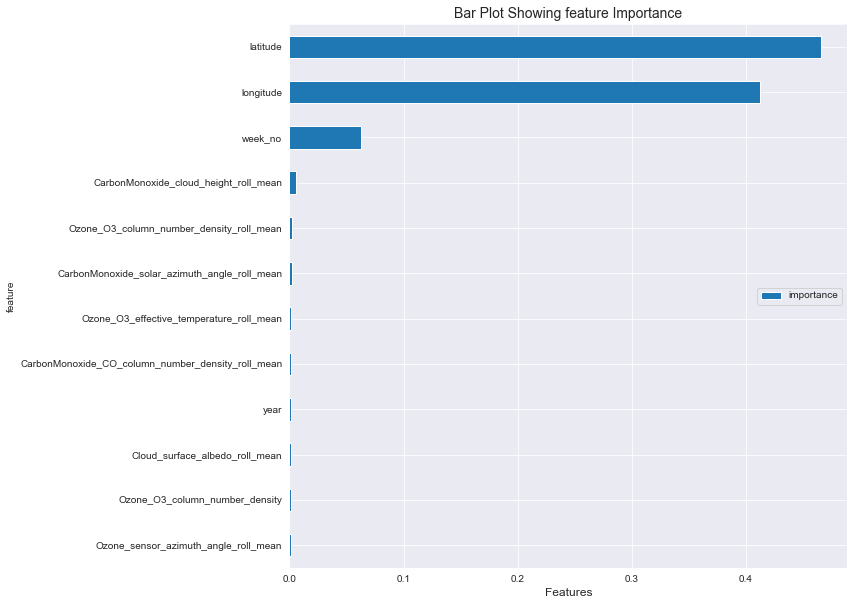

In [76]:
# Feature Importance
impo_df = pd.DataFrame({'feature':X.columns,'importance':clf.feature_importances_}).set_index('feature').sort_values(by='importance',ascending=False)
impo_df = impo_df[:12].sort_values(by='importance',ascending=True)
impo_df.plot(kind='barh',figsize=(10,10))
plt.legend(loc='center right')
plt.title('Bar Plot Showing feature Importance',fontsize=14)
plt.xlabel('Features',fontsize=12)
plt.show()

In [77]:
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK','location'],axis=1).fillna(0)
predictions = clf.predict(test_df)

In [78]:
sub_file = pd.DataFrame({"ID_LAT_LON_YEAR_WEEK":test_eng['ID_LAT_LON_YEAR_WEEK'],'emission':predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.661205
1,ID_-0.510_29.290_2022_01,4.221294
2,ID_-0.510_29.290_2022_02,4.248919
3,ID_-0.510_29.290_2022_03,4.348766
4,ID_-0.510_29.290_2022_04,4.105861


In [79]:
sub_file.to_csv('BaselineSubmission.csv',index=False)